In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
import numpy as np

class Brownian:
    """
    Create a Brownian motion class.
    """
    def __init__(self, initial_value=0):
        """
        Initialize the class (initial value = 0) for Brownian motion.
        
        Parameters:
        - initial_value (float or int, optional): Initial value of Brownian motion = 0 (by default)
        """
        if not (isinstance(initial_value, (float, int)) or initial_value is None):
            raise ValueError("Expected a float, int, or None for the initial value.")
        
        self.initial_value = float(initial_value)
    
    def generate_random_walk(self, num_steps=100):
        """
        To generate a random walk with a specified num_steps.
        
        Parameters:
        - num_steps (int, optional): Number of steps for the walk. Defaults to 100.
        
        Returns:
        - np.ndarray: A NumPy array with `num_steps` points.
        """
        if num_steps < 30:
            print("WARNING: A small number of steps may not produce accurate stochastic process sequence.")
        
        walk = np.full(num_steps, self.initial_value)
        
        for step in range(1, num_steps):
            # Sample from a uniform distribution of 1 or -1
            step_direction = np.random.choice([1, -1])
            # Update the walk with the scaled step
            walk[step] = walk[step - 1] + step_direction / np.sqrt(num_steps)
        
        return walk
    
    def generate_normal_walk(self, num_steps=100):
        """
        Generate a random walk using the normal distribution.
        
        Parameters:
        - num_steps (int, optional): Number of steps for the walk. Defaults to 100.
        
        Returns:
        - np.ndarray: A NumPy array with `num_steps` points.
        """
        if num_steps < 30:
            print("WARNING: A small number of steps may not produce an accurate stochastic process sequence.")
        
        walk = np.full(num_steps, self.initial_value)
        
        for step in range(1, num_steps):
            # Sample from a standard normal distribution
            random_step = np.random.normal()
            # Update the walk with the scaled step
            walk[step] = walk[step - 1] + random_step / np.sqrt(num_steps)
        
        return walk
    
    def stock_price(
                    self,
                    s0=100,
                    mu=0.2,
                    sigma=0.68,
                    deltaT=52,
                    dt=0.1
                    ):
        """
        Models a stock price S(t) using the Weiner process W(t) as
        `S(t) = S(0).exp{(mu-(sigma^2/2).t)+sigma.W(t)}`
        
        Arguments:
            s0: Iniital stock price, default 100
            mu: 'Drift' of the stock (upwards or downwards), default 1
            sigma: 'Volatility' of the stock, default 1
            deltaT: The time period for which the future prices are computed, default 52 (as in 52 weeks)
            dt (optional): The granularity of the time-period, default 0.1
        
        Returns:
            s: A NumPy array with the simulated stock prices over the time-period deltaT
        """
        n_step = int(deltaT/dt)
        time_vector = np.linspace(0,deltaT,num=n_step)
        # Stock variation
        stock_var = (mu-(sigma**2/2))*time_vector
        # Forcefully set the initial value to zero for the stock price simulation
        self.x0=0
        # Weiner process (calls the `gen_normal` method)
        weiner_process = sigma*self.generate_normal_walk(n_step)
        # Add two time series, take exponent, and multiply by the initial stock price
        s = s0*(np.exp(stock_var+weiner_process))
        
        return s

In [52]:
b = Brownian()

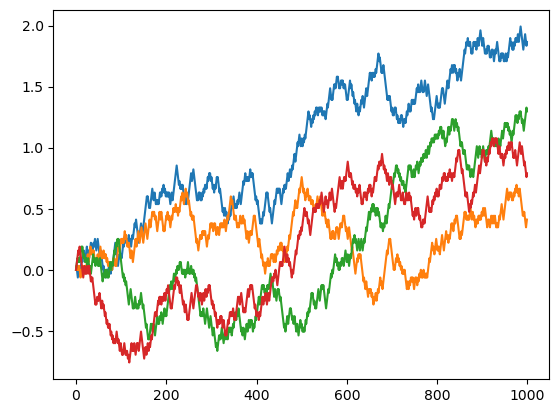

In [53]:

for i in range(4):
    plt.plot(b.generate_random_walk(1000))
plt.show()

Process with initial value of 50 and using Normal distribution

In [54]:
b = Brownian(20)

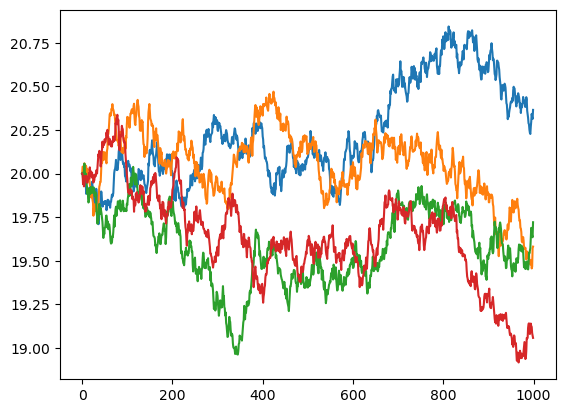

In [55]:
for i in range(4):
    plt.plot(b.generate_normal_walk(1000))
plt.show()

Stock price simulation


In [56]:
def plot_stock_price(mu,sigma):
    """
    Plots stock price for multiple scenarios
    """
    plt.figure(figsize=(9,4))
    for i in range(5):
        plt.plot(b.stock_price(mu=mu,
                               sigma=sigma,
                               dt=0.1))
    plt.legend(['Scenario-'+str(i) for i in range(1,6)],
               loc='upper left')
    plt.hlines(y=100,xmin=0,xmax=520,
               linestyle='--',color='k')
    plt.show()

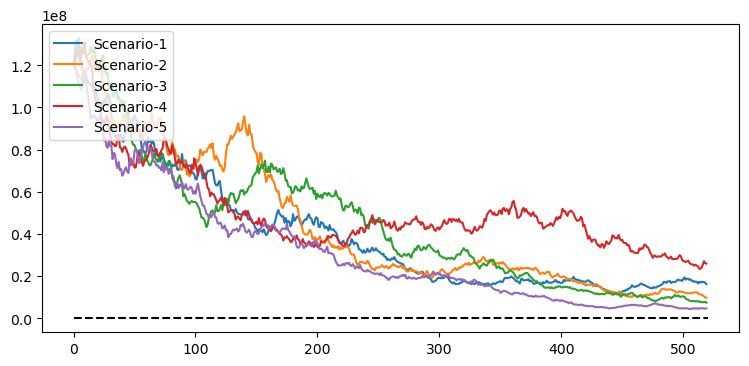

In [57]:
plot_stock_price(mu=0.2,sigma=0.7)


A slight change in the volatility


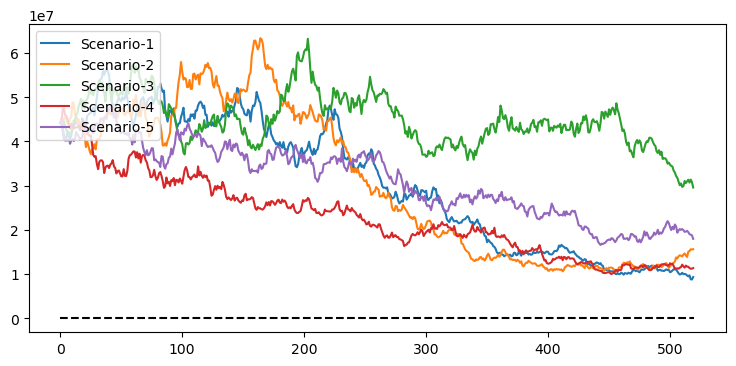

In [58]:
plot_stock_price(mu=0.2,sigma=0.65
                 )


Lowering the volatility further down


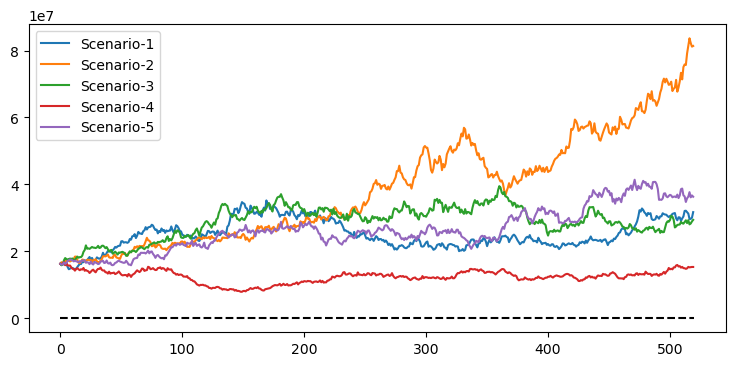

In [59]:
plot_stock_price(mu=0.2,sigma=0.6)


Two-dimensional plot


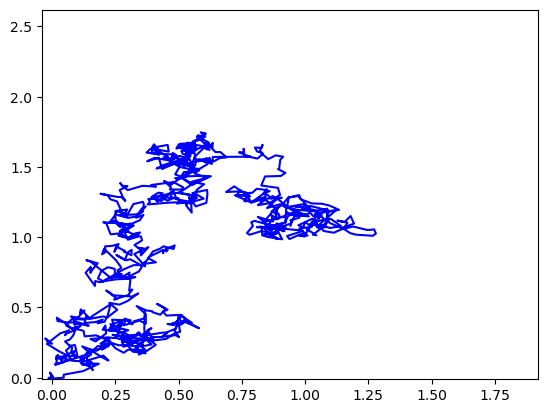

In [65]:
b1 = Brownian()
b2 = Brownian()

x = b1.generate_normal_walk(1000)
y = b2.generate_normal_walk(1000)

plt.plot(x,y,c='b')
xmax,xmin,ymax,ymin = x.max(),x.min(),y.max(),y.min()
scale_factor = 1.5
xmax,xmin,ymax,ymin = xmax*scale_factor,xmin*scale_factor,ymax*scale_factor,ymin*scale_factor
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()

Biased motion in 2 D

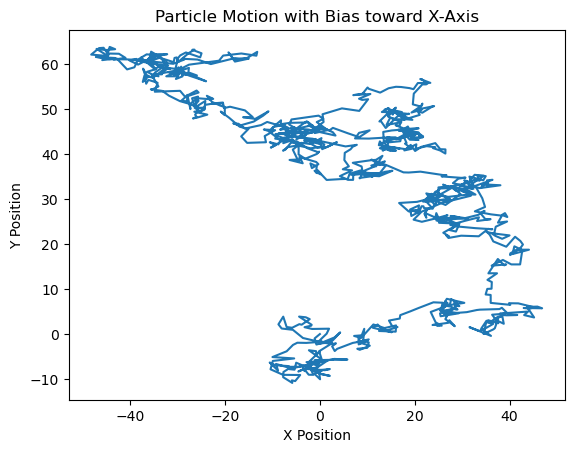

In [74]:
import numpy as np

class BiasedMotion:
    """
    A class to simulate the motion of a particle with a preference for movement along the x-axis.
    """
    def __init__(self, x0=0, y0=0, bias=2):
        """
        Initializes the class with initial positions and bias.
        
        Arguments:
            x0: Initial x-coordinate (default is 0).
            y0: Initial y-coordinate (default is 0).
            bias: Bias factor favoring movement along the x-axis (default is 2.0).
        """
        assert isinstance(x0, (int, float)), "x0 should be an integer or float."
        assert isinstance(y0, (int, float)), "y0 should be an integer or float."
        assert isinstance(bias, (int, float)) and bias > 0, "bias should be a positive number."

        self.x0 = x0
        self.y0 = y0
        self.bias = bias
    
    def generate_motion(self, n_steps=100):
        """
        Generates the motion of the particle over a given number of steps.
        
        Arguments:
            n_steps: The number of steps to simulate (default is 100).
            
        Returns:
            A tuple of arrays (x_positions, y_positions) representing the particle's path.
        """
        # Initialize arrays for positions
        x_positions = np.zeros(n_steps)
        y_positions = np.zeros(n_steps)
        
        # Set the initial positions
        x_positions[0] = self.x0
        y_positions[0] = self.y0
        
        # Generate motion
        for i in range(1, n_steps):
            # Generate a random step along the x-axis with bias
            x_step = np.random.normal() * self.bias
            # Generate a random step along the y-axis
            y_step = np.random.normal()
            
            # Update positions
            x_positions[i] = x_positions[i - 1] + x_step
            y_positions[i] = y_positions[i - 1] + y_step
        
        return x_positions, y_positions

# Example usage:
# Create an instance of BiasedMotion
particle = BiasedMotion()

# Generate motion for 1000 steps
x_positions, y_positions = particle.generate_motion(1000)

# Plot the motion
import matplotlib.pyplot as plt

plt.plot(x_positions, y_positions)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Particle Motion with Bias toward X-Axis')
plt.show()


No Bias + smaller steps along x axis

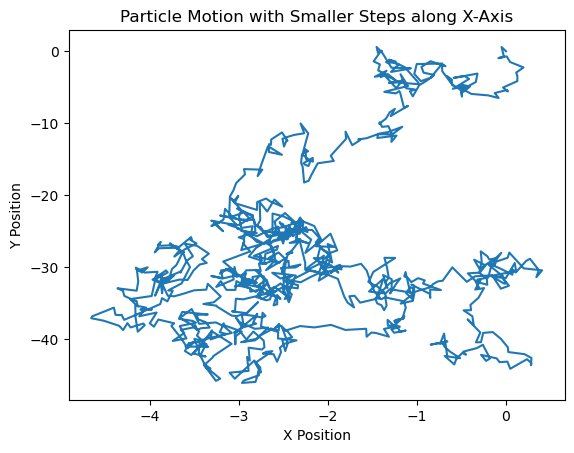

In [79]:
import numpy as np

class ParticleMotion:
    """
    A class to simulate the motion of a particle with smaller steps along the x-axis compared to the y-axis.
    """
    def __init__(self, x0=0, y0=0, x_std_dev=0.5, y_std_dev=1.0):
        """
        Initializes the class with initial positions and standard deviations for the x and y axes.
        
        Arguments:
            x0: Initial x-coordinate (default is 0).
            y0: Initial y-coordinate (default is 0).
            x_std_dev: Standard deviation for steps along the x-axis (default is 0.5).
            y_std_dev: Standard deviation for steps along the y-axis (default is 1.0).
        """
        assert isinstance(x0, (int, float)), "x0 should be an integer or float."
        assert isinstance(y0, (int, float)), "y0 should be an integer or float."
        assert isinstance(x_std_dev, (int, float)) and x_std_dev > 0, "x_std_dev should be a positive number."
        assert isinstance(y_std_dev, (int, float)) and y_std_dev > 0, "y_std_dev should be a positive number."

        self.x0 = x0
        self.y0 = y0
        self.x_std_dev = x_std_dev
        self.y_std_dev = y_std_dev
    
    def generate_motion(self, n_steps=100):
        """
        Generates the motion of the particle over a given number of steps.
        
        Arguments:
            n_steps: The number of steps to simulate (default is 100).
            
        Returns:
            A tuple of arrays (x_positions, y_positions) representing the particle's path.
        """
        # Initialize arrays for positions
        x_positions = np.zeros(n_steps)
        y_positions = np.zeros(n_steps)
        
        # Set the initial positions
        x_positions[0] = self.x0
        y_positions[0] = self.y0
        
        # Generate motion
        for i in range(1, n_steps):
            # Generate a random step along the x-axis using a smaller standard deviation
            x_step = np.random.normal(0, self.x_std_dev)
            # Generate a random step along the y-axis using a larger standard deviation
            y_step = np.random.normal(0, self.y_std_dev)
            
            # Update positions
            x_positions[i] = x_positions[i - 1] + x_step
            y_positions[i] = y_positions[i - 1] + y_step
        
        return x_positions, y_positions

# Example usage:
# Create an instance of ParticleMotion
particle = ParticleMotion(x_std_dev=0.1, y_std_dev=1.0)

# Generate motion for 1000 steps
x_positions, y_positions = particle.generate_motion(1000)

# Plot the motion
import matplotlib.pyplot as plt

plt.plot(x_positions, y_positions)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Particle Motion with Smaller Steps along X-Axis')
plt.show()


Brownian motion in nematic LCs neglecting the distortion of director because of anchoring. Spherical particle

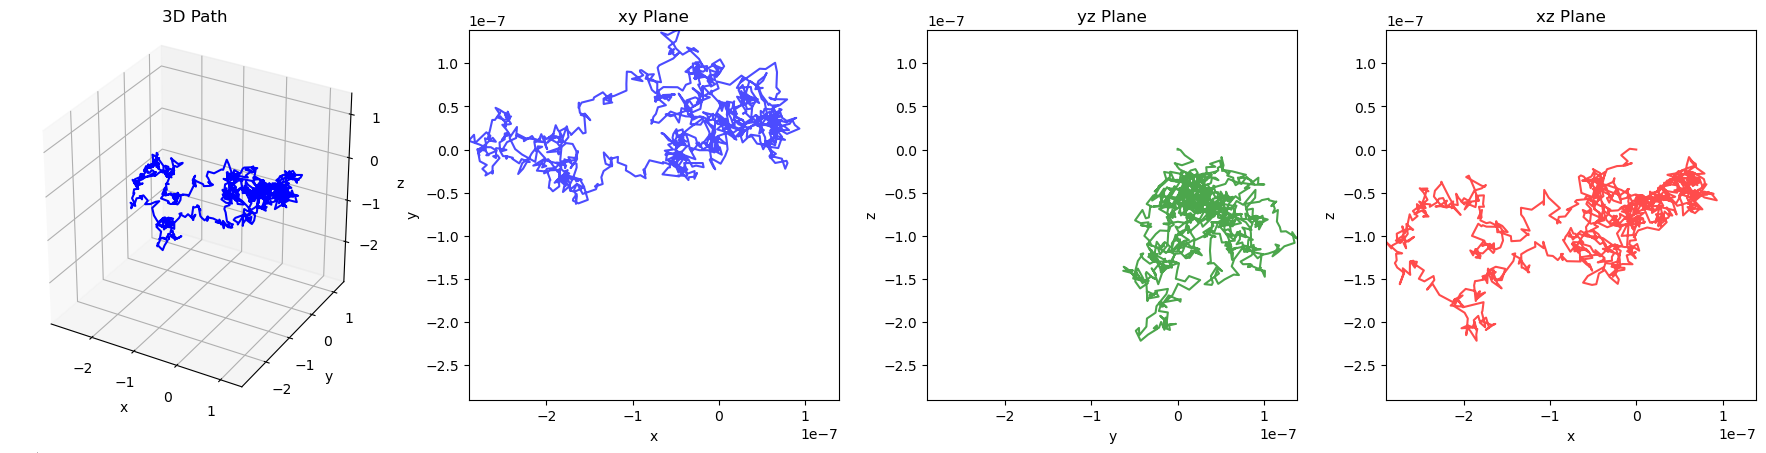

In [163]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Class to simulate Brownian motion in nematic liquid crystals
class NematicLCBrownianMotion:
    def __init__(self, eta1, eta2, eta3, temperature, particle_radius):
        # Initialize viscosities and particle radius
        self.eta1 = eta1
        self.eta2 = eta2
        self.eta3 = eta3
        self.temperature = temperature
        self.particle_radius = particle_radius
        
        # Boltzmann constant
        k_B = 1.38e-23
        
        # Calculate diffusion coefficients using the Stokes-Einstein relation
        self.diffusion_coeff1 = k_B * temperature / (6 * np.pi * eta1 * particle_radius)
        self.diffusion_coeff2 = k_B * temperature / (6 * np.pi * eta2 * particle_radius)
        self.diffusion_coeff3 = k_B * temperature / (6 * np.pi * eta3 * particle_radius)
    
    def generate_motion(self, n_steps=1000, dt=1e-3):
        # Initialize arrays to store the particle's positions
        x_positions = np.zeros(n_steps)
        y_positions = np.zeros(n_steps)
        z_positions = np.zeros(n_steps)
        
        # Simulation loop
        for i in range(1, n_steps):
            # Generate random displacements along each axis
            x_step = np.random.normal(0, np.sqrt(2 * self.diffusion_coeff1 * dt))
            y_step = np.random.normal(0, np.sqrt(2 * self.diffusion_coeff2 * dt))
            z_step = np.random.normal(0, np.sqrt(2 * self.diffusion_coeff3 * dt))
            
            # Update positions
            x_positions[i] = x_positions[i - 1] + x_step
            y_positions[i] = y_positions[i - 1] + y_step
            z_positions[i] = z_positions[i - 1] + z_step
        
        # Return arrays of positions
        return x_positions, y_positions, z_positions
    

    def calculate_msd(self, positions):
        # Calculate the mean squared displacement
        n_steps = len(positions)
        msd = np.zeros(n_steps)
        
        # Calculate MSD for each time lag (tau)
        for tau in range(1, n_steps):
            # Calculate squared displacements
            displacements_squared = (positions[tau:] - positions[:-tau])**2
            # Calculate mean squared displacement for current time lag
            msd[tau] = np.mean(displacements_squared)
        
        return msd
    

# Parameters for the simulation
eta1 = 0.1  # Viscosity along x-axis in Pa.s
eta2 = 0.05  # Viscosity along y-axis in Pa.s
eta3 = 0.02  # Viscosity along z-axis in Pa.s
temperature = 300  # Temperature in Kelvin
particle_radius = 1e-6  # Particle radius in meters

# Create an instance of the NematicLCBrownianMotion class
particle = NematicLCBrownianMotion(eta1, eta2, eta3, temperature, particle_radius)

# Simulate the particle's motion
n_steps = 1000  # Number of steps in the simulation
dt = 0.01  # Time step in seconds
x_positions, y_positions, z_positions = particle.generate_motion(n_steps, dt)

# Create a figure with a grid layout to hold the 3D plot and the three 2D plots side by side
fig = plt.figure(figsize=(18, 4))
ax_3d = fig.add_subplot(1, 4, 1, projection='3d')

# Plot the 3D path of the particle
ax_3d.plot(x_positions, y_positions, z_positions, color='b')
ax_3d.set_title('3D Path')
ax_3d.set_xlabel('x')
ax_3d.set_ylabel('y')
ax_3d.set_zlabel('z')

# Plotting the xy plane
ax_xy = fig.add_subplot(1, 4, 2)
ax_xy.plot(x_positions, y_positions, alpha=0.7, color='b')
ax_xy.set_xlabel('x')
ax_xy.set_ylabel('y')
ax_xy.set_title('xy Plane')

# Plotting the yz plane
ax_yz = fig.add_subplot(1, 4, 3)
ax_yz.plot(y_positions, z_positions, alpha=0.7, color='g')
ax_yz.set_xlabel('y')
ax_yz.set_ylabel('z')
ax_yz.set_title('yz Plane')

# Plotting the xz plane
ax_xz = fig.add_subplot(1, 4, 4)
ax_xz.plot(x_positions, z_positions, alpha=0.7, color='r')
ax_xz.set_xlabel('x')
ax_xz.set_ylabel('z')
ax_xz.set_title('xz Plane')

# Adjust the layout
plt.subplots_adjust(wspace=1)  # Increase horizontal spacing between plots



x_min, x_max = np.min(x_positions), np.max(x_positions)
y_min, y_max = np.min(y_positions), np.max(y_positions)
z_min, z_max = np.min(z_positions), np.max(z_positions)

# Determine the overall minimum and maximum limits for consistent scaling
overall_min = min(x_min, y_min, z_min)
overall_max = max(x_max, y_max, z_max)

# Set limits for 3D plot
ax_3d.set_xlim(overall_min, overall_max)
ax_3d.set_ylim(overall_min, overall_max)
ax_3d.set_zlim(overall_min, overall_max)
ax_3d.set_aspect('equal')  # Set aspect ratio to be equal

# Set limits for xy plane plot
ax_xy.set_xlim(overall_min, overall_max)
ax_xy.set_ylim(overall_min, overall_max)
ax_xy.set_aspect('equal')  # Set aspect ratio to be equal

# Set limits for yz plane plot
ax_yz.set_xlim(overall_min, overall_max)
ax_yz.set_ylim(overall_min, overall_max)
ax_yz.set_aspect('equal')  # Set aspect ratio to be equal

# Set limits for xz plane plot
ax_xz.set_xlim(overall_min, overall_max)
ax_xz.set_ylim(overall_min, overall_max)
ax_xz.set_aspect('equal')  # Set aspect ratio to be equal

# Display the plots
plt.tight_layout()
plt.show()


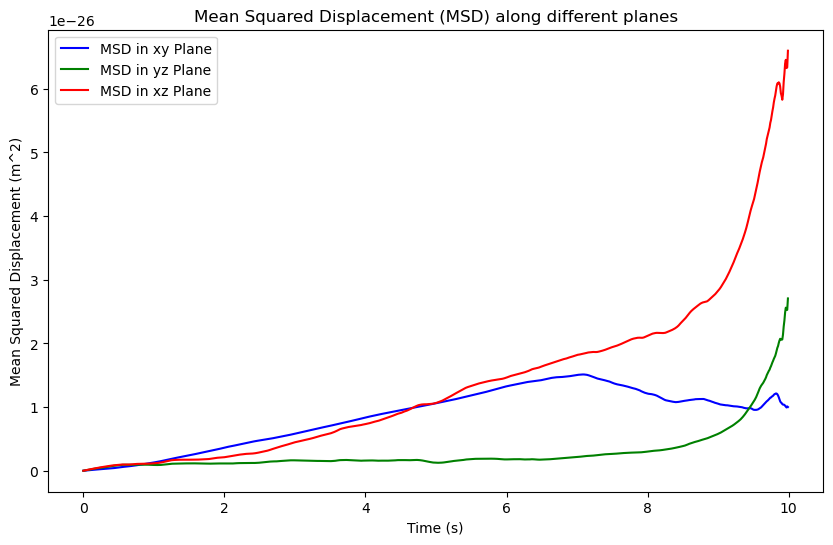

In [133]:
# Calculate MSD for each plane
msd_xy = particle.calculate_msd(x_positions**2 + y_positions**2)
msd_yz = particle.calculate_msd(y_positions**2 + z_positions**2)
msd_xz = particle.calculate_msd(x_positions**2 + z_positions**2)

# Calculate time values for the MSD plots
time_values = np.arange(n_steps) * dt

# Plotting the MSD along xy, yz, and xz planes
plt.figure(figsize=(10, 6))

# Plotting MSD in xy plane
plt.plot(time_values, msd_xy, label='MSD in xy Plane', color='b')

# Plotting MSD in yz plane
plt.plot(time_values, msd_yz, label='MSD in yz Plane', color='g')

# Plotting MSD in xz plane
plt.plot(time_values, msd_xz, label='MSD in xz Plane', color='r')

# Adding plot labels and title
plt.xlabel('Time (s)')
plt.ylabel('Mean Squared Displacement (m^2)')
plt.title('Mean Squared Displacement (MSD) along different planes')
plt.legend()

# Display the plot
plt.show()

Statistical properties

Statistical properties along x-axis:
Mean position: 0.0000, Variance: 0.0000
Skewness of positions: 0.1963, Kurtosis of positions: -1.0564
Mean velocity: 0.0000, Variance of velocity: 0.0000
Skewness of velocities: 0.0037, Kurtosis of velocities: 0.0664



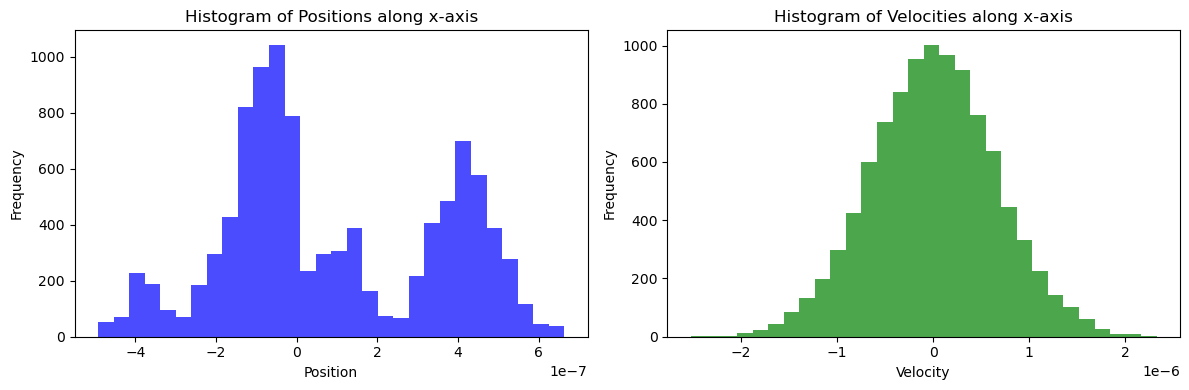

Statistical properties along y-axis:
Mean position: 0.0000, Variance: 0.0000
Skewness of positions: 0.6926, Kurtosis of positions: -1.1047
Mean velocity: 0.0000, Variance of velocity: 0.0000
Skewness of velocities: -0.0143, Kurtosis of velocities: -0.0426



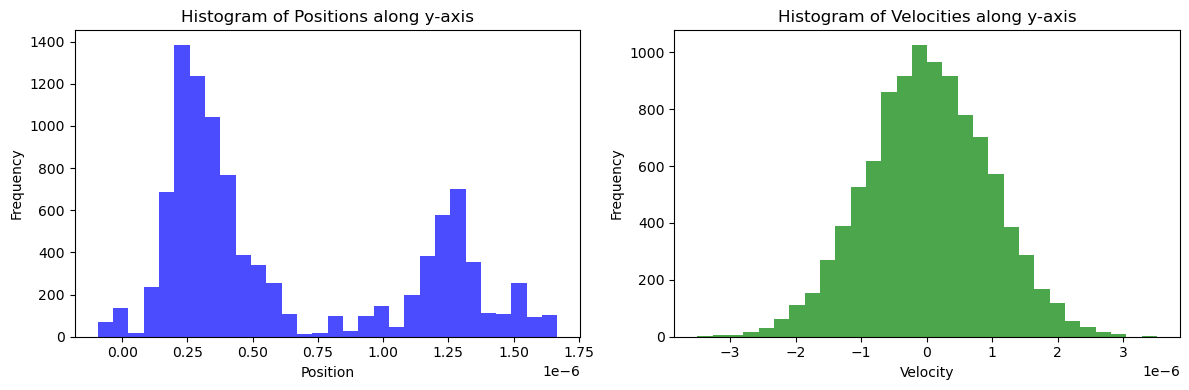

Statistical properties along z-axis:
Mean position: 0.0000, Variance: 0.0000
Skewness of positions: -0.0355, Kurtosis of positions: -1.0297
Mean velocity: 0.0000, Variance of velocity: 0.0000
Skewness of velocities: -0.0076, Kurtosis of velocities: -0.0036



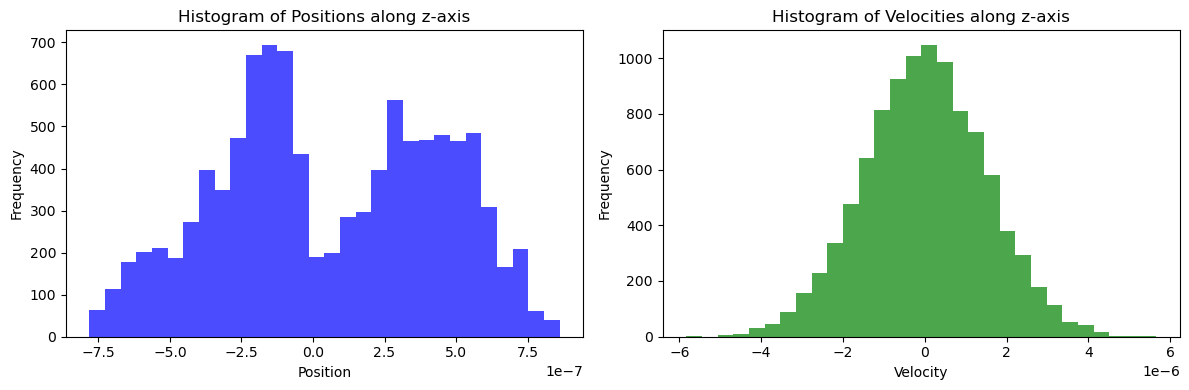

In [160]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Class to simulate Brownian motion in nematic liquid crystals
class NematicLCBrownianMotion:
    def __init__(self, eta1, eta2, eta3, temperature, particle_radius):
        # Initialize viscosities and particle radius
        self.eta1 = eta1
        self.eta2 = eta2
        self.eta3 = eta3
        self.temperature = temperature
        self.particle_radius = particle_radius
        
        # Boltzmann constant
        k_B = 1.38e-23
        
        # Calculate diffusion coefficients using the Stokes-Einstein relation
        self.diffusion_coeff1 = k_B * temperature / (6 * np.pi * eta1 * particle_radius)
        self.diffusion_coeff2 = k_B * temperature / (6 * np.pi * eta2 * particle_radius)
        self.diffusion_coeff3 = k_B * temperature / (6 * np.pi * eta3 * particle_radius)
    
    def generate_motion(self, n_steps=1000, dt=1e-3):
        # Initialize arrays to store the particle's positions
        x_positions = np.zeros(n_steps)
        y_positions = np.zeros(n_steps)
        z_positions = np.zeros(n_steps)
        
        # Simulation loop
        for i in range(1, n_steps):
            # Generate random displacements along each axis
            x_step = np.random.normal(0, np.sqrt(2 * self.diffusion_coeff1 * dt))
            y_step = np.random.normal(0, np.sqrt(2 * self.diffusion_coeff2 * dt))
            z_step = np.random.normal(0, np.sqrt(2 * self.diffusion_coeff3 * dt))
            
            # Update positions
            x_positions[i] = x_positions[i - 1] + x_step
            y_positions[i] = y_positions[i - 1] + y_step
            z_positions[i] = z_positions[i - 1] + z_step
        
        # Return arrays of positions
        return x_positions, y_positions, z_positions
    
    def calculate_velocity(self, positions, dt):
        # Calculate velocity from positions
        return np.diff(positions) / dt
    
    def analyze_statistical_properties(self, positions, velocities, axis):
        # Calculate mean, variance, skewness, and kurtosis for positions
        mean_pos = np.mean(positions)
        var_pos = np.var(positions)
        skew_pos = skew(positions)
        kurt_pos = kurtosis(positions)
        
        # Calculate mean, variance, skewness, and kurtosis for velocities
        mean_vel = np.mean(velocities)
        var_vel = np.var(velocities)
        skew_vel = skew(velocities)
        kurt_vel = kurtosis(velocities)
        
        # Print the statistical properties
        print(f"Statistical properties along {axis}-axis:")
        print(f"Mean position: {mean_pos:.4f}, Variance: {var_pos:.4f}")
        print(f"Skewness of positions: {skew_pos:.4f}, Kurtosis of positions: {kurt_pos:.4f}")
        print(f"Mean velocity: {mean_vel:.4f}, Variance of velocity: {var_vel:.4f}")
        print(f"Skewness of velocities: {skew_vel:.4f}, Kurtosis of velocities: {kurt_vel:.4f}")
        print()
        
        # Plot histogram of positions and velocities
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        # Histogram of positions
        axes[0].hist(positions, bins=30, color='b', alpha=0.7)
        axes[0].set_title(f'Histogram of Positions along {axis}-axis')
        axes[0].set_xlabel('Position')
        axes[0].set_ylabel('Frequency')
        
        # Histogram of velocities
        axes[1].hist(velocities, bins=30, color='g', alpha=0.7)
        axes[1].set_title(f'Histogram of Velocities along {axis}-axis')
        axes[1].set_xlabel('Velocity')
        axes[1].set_ylabel('Frequency')
        
        # Display the plots
        plt.tight_layout()
        plt.show()

# Parameters for the simulation
eta1 = 0.1  # Viscosity along x-axis in Pa.s
eta2 = 0.05  # Viscosity along y-axis in Pa.s
eta3 = 0.02  # Viscosity along z-axis in Pa.s
temperature = 300  # Temperature in Kelvin
particle_radius = 1e-6  # Particle radius in meters
dt = 0.01  # Time step in seconds
n_steps = 10000  # Number of steps in the simulation

# Create an instance of the NematicLCBrownianMotion class
particle = NematicLCBrownianMotion(eta1, eta2, eta3, temperature, particle_radius)

# Simulate the particle's motion
x_positions, y_positions, z_positions = particle.generate_motion(n_steps, dt)

# Calculate velocities
x_velocities = particle.calculate_velocity(x_positions, dt)
y_velocities = particle.calculate_velocity(y_positions, dt)
z_velocities = particle.calculate_velocity(z_positions, dt)

# Analyze statistical properties along each axis
particle.analyze_statistical_properties(x_positions, x_velocities, 'x')
particle.analyze_statistical_properties(y_positions, y_velocities, 'y')
particle.analyze_statistical_properties(z_positions, z_velocities, 'z')


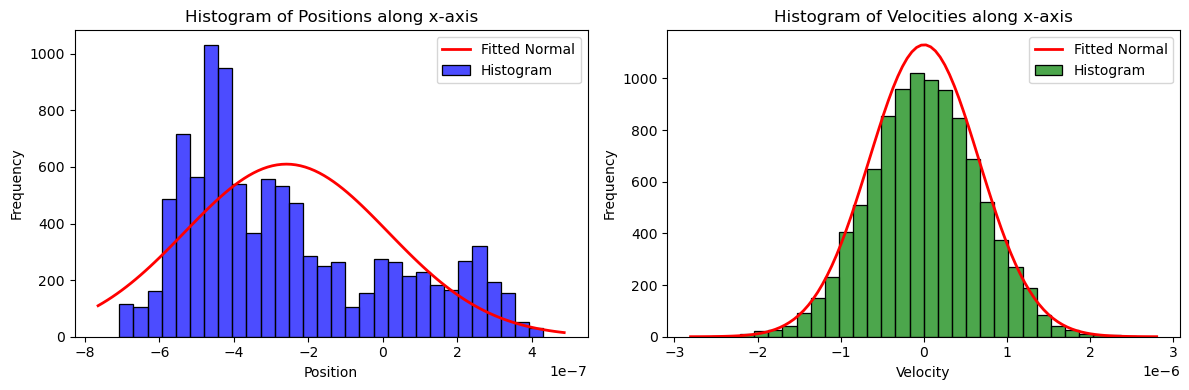

Fitted normal distribution along x-axis:
Positions - Mean: -0.0000, Std Dev: 0.0000
Velocities - Mean: 0.0000, Std Dev: 0.0000



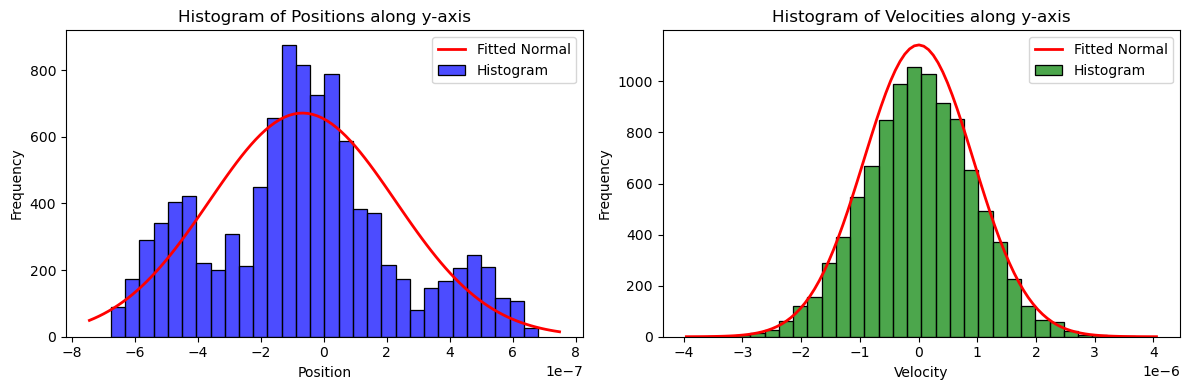

Fitted normal distribution along y-axis:
Positions - Mean: -0.0000, Std Dev: 0.0000
Velocities - Mean: 0.0000, Std Dev: 0.0000



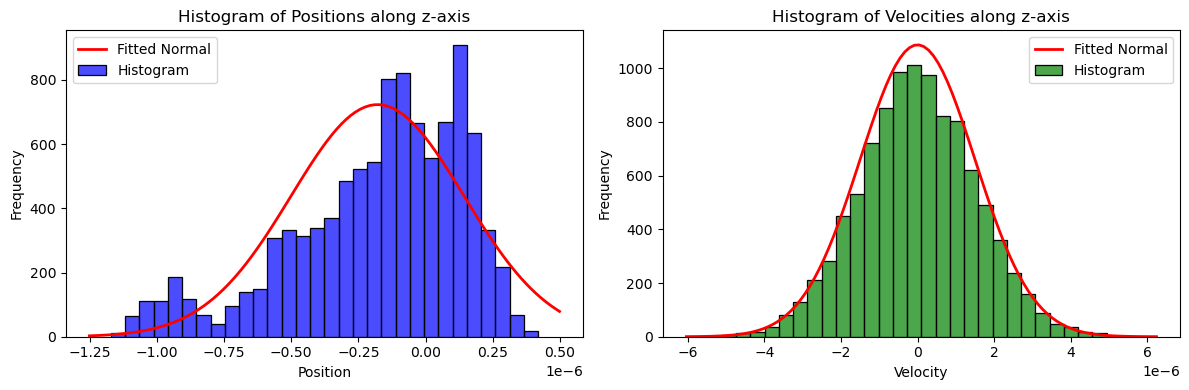

Fitted normal distribution along z-axis:
Positions - Mean: -0.0000, Std Dev: 0.0000
Velocities - Mean: 0.0000, Std Dev: 0.0000



In [158]:
from scipy.stats import norm
import seaborn as sns

def fit_histogram(positions, velocities, axis):
    # Fit normal distribution to positions and velocities
    pos_mean, pos_std = norm.fit(positions)
    vel_mean, vel_std = norm.fit(velocities)
    
    # Create plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram and fitted curve for positions
    sns.histplot(positions, bins=30, color='b', alpha=0.7, kde=False, ax=axes[0], label='Histogram')
    xmin, xmax = axes[0].get_xlim()
    x_pos = np.linspace(xmin, xmax, 100)
    axes[0].plot(x_pos, norm.pdf(x_pos, pos_mean, pos_std) * len(positions) * (xmax - xmin) / 30, 'r-', lw=2, label='Fitted Normal')
    axes[0].set_title(f'Histogram of Positions along {axis}-axis')
    axes[0].set_xlabel('Position')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    
    # Histogram and fitted curve for velocities
    sns.histplot(velocities, bins=30, color='g', alpha=0.7, kde=False, ax=axes[1], label='Histogram')
    xmin, xmax = axes[1].get_xlim()
    x_vel = np.linspace(xmin, xmax, 100)
    axes[1].plot(x_vel, norm.pdf(x_vel, vel_mean, vel_std) * len(velocities) * (xmax - xmin) / 30, 'r-', lw=2, label='Fitted Normal')
    axes[1].set_title(f'Histogram of Velocities along {axis}-axis')
    axes[1].set_xlabel('Velocity')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    
    # Display the plots
    plt.tight_layout()
    plt.show()
    
    # Print fitted parameters
    print(f"Fitted normal distribution along {axis}-axis:")
    print(f"Positions - Mean: {pos_mean:.4f}, Std Dev: {pos_std:.4f}")
    print(f"Velocities - Mean: {vel_mean:.4f}, Std Dev: {vel_std:.4f}")
    print()

# Fit histograms and plot for each axis
fit_histogram(x_positions, x_velocities, 'x')
fit_histogram(y_positions, y_velocities, 'y')
fit_histogram(z_positions, z_velocities, 'z')


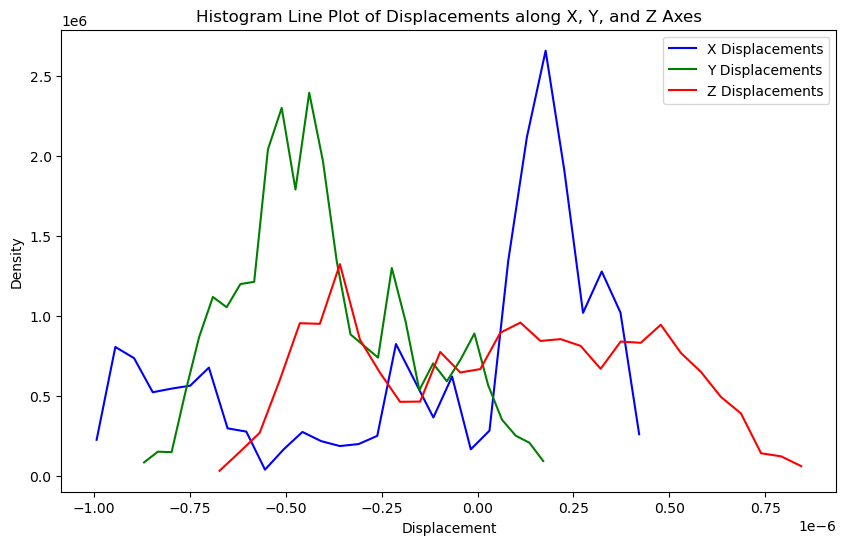

In [154]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of bins for the histograms
n_bins = 30

# Create a figure
plt.figure(figsize=(10, 6))

# Plot histogram line plot of x displacements
hist_x, bins_x = np.histogram(x_positions, bins=n_bins, density=True)
bin_centers_x = (bins_x[1:] + bins_x[:-1]) / 2
plt.plot(bin_centers_x, hist_x, color='b', label='X Displacements')

# Plot histogram line plot of y displacements
hist_y, bins_y = np.histogram(y_positions, bins=n_bins, density=True)
bin_centers_y = (bins_y[1:] + bins_y[:-1]) / 2
plt.plot(bin_centers_y, hist_y, color='g', label='Y Displacements')

# Plot histogram line plot of z displacements
hist_z, bins_z = np.histogram(z_positions, bins=n_bins, density=True)
bin_centers_z = (bins_z[1:] + bins_z[:-1]) / 2
plt.plot(bin_centers_z, hist_z, color='r', label='Z Displacements')

# Add title and labels
plt.title('Histogram Line Plot of Displacements along X, Y, and Z Axes')
plt.xlabel('Displacement')
plt.ylabel('Density')

# Add legend
plt.legend()

# Display the plot
plt.show()
